<a href="https://colab.research.google.com/github/Dokkaebi00/POS_Tagging-with-HMM/blob/master/Stanza_HMM_eval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install & Import (RUN THIS) 

In [1]:
!pip install stanza

     |████████████████████████████████| 286kB 5.5MB/s 


In [2]:
import stanza 

# Setting up Stanza (RUN THIS)  



In [3]:
# Download the Stanford CoreNLP package with Stanza's installation command
# This'll take several minutes, depending on the network speed
corenlp_dir = './corenlp'
stanza.install_corenlp(dir=corenlp_dir)

# Set the CORENLP_HOME environment variable to point to the installation location
import os
os.environ["CORENLP_HOME"] = corenlp_dir

2021-01-31 09:27:49 INFO: Installing CoreNLP package into ./corenlp...
2021-01-31 09:28:38 WARNING: For customized installation location, please set the `CORENLP_HOME` environment variable to the location of the installation. In Unix, this is done with `export CORENLP_HOME=./corenlp`.


In [4]:
!ls $CORENLP_HOME

build.xml				  jollyday.jar
corenlp.sh				  LIBRARY-LICENSES
CoreNLP-to-HTML.xsl			  LICENSE.txt
ejml-core-0.39.jar			  Makefile
ejml-core-0.39-sources.jar		  patterns
ejml-ddense-0.39.jar			  pom-java-11.xml
ejml-ddense-0.39-sources.jar		  pom.xml
ejml-simple-0.39.jar			  protobuf.jar
ejml-simple-0.39-sources.jar		  README.txt
input.txt				  RESOURCE-LICENSES
input.txt.out				  SemgrexDemo.java
input.txt.xml				  ShiftReduceDemo.java
javax.activation-api-1.2.0.jar		  slf4j-api.jar
javax.activation-api-1.2.0-sources.jar	  slf4j-simple.jar
javax.json-api-1.0-sources.jar		  stanford-corenlp-4.2.0.jar
javax.json.jar				  stanford-corenlp-4.2.0-javadoc.jar
jaxb-api-2.4.0-b180830.0359.jar		  stanford-corenlp-4.2.0-models.jar
jaxb-api-2.4.0-b180830.0359-sources.jar   stanford-corenlp-4.2.0-sources.jar
jaxb-core-2.3.0.1.jar			  StanfordCoreNlpDemo.java
jaxb-core-2.3.0.1-sources.jar		  StanfordDependenciesManual.pdf
jaxb-impl-2.4.0-b180830.0438.jar	  sutime
jaxb-impl-2.4.0-b180830.0438-sources

## Constructing CoreNLP Client
 

In [5]:
# Import client module
from stanza.server import CoreNLPClient

In [11]:
# Construct a CoreNLPClient with some basic annotators, a memory allocation of 4GB, and port number 9001
client = CoreNLPClient(
    annotators=['tokenize','ssplit', 'pos', 'lemma', 'ner'], 
    memory='4G', 
    endpoint='http://localhost:9001',
    be_quiet=True)
print(client)

# Start the background server and wait for some time
# Note that in practice this is totally optional, as by default the server will be started when the first annotation is performed
client.start()
import time; time.sleep(10)

2021-01-31 09:36:58 INFO: Writing properties to tmp file: corenlp_server-1909151b39ba449b.props
2021-01-31 09:36:58 INFO: Starting server with command: java -Xmx4G -cp ./corenlp/* edu.stanford.nlp.pipeline.StanfordCoreNLPServer -port 9001 -timeout 60000 -threads 5 -maxCharLength 100000 -quiet True -serverProperties corenlp_server-1909151b39ba449b.props -annotators tokenize,ssplit,pos,lemma,ner -preload -outputFormat serialized


## Check CoreNLP server status 

In [21]:
# Print background processes and look for java
# You should be able to see a StanfordCoreNLPServer java process running in the background
!ps -o pid,cmd | grep java

    111 java -Xmx4G -cp ./corenlp/* edu.stanford.nlp.pipeline.StanfordCoreNLPServer -port 9001 -timeout 60000 -threads 5 -maxCharLength 100000 -quiet True -serverProperties corenlp_server-72097373581e4f9e.props -annotators tokenize,ssplit,pos,lemma,ner -preload -outputFormat serialized
    132 /bin/bash -c ps -o pid,cmd | grep java
    134 grep java


## Check Annotating Text

In [22]:
# Annotate some text
text = "Albert Einstein was a German-born theoretical physicist. He developed the theory of relativity."
document = client.annotate(text)
print(type(document))

<class 'CoreNLP_pb2.Document'>


# Accessing Annotations

CoreNLP Document: https://stanfordnlp.github.io/stanza/pos.html

In [23]:
# Iterate over all tokens in all sentences, and print out the word, lemma, pos and ner tags
print("{:12s}\t{:12s}\t{:6s}\t{}".format("Word", "Lemma", "POS", "NER"))

for i, sent in enumerate(document.sentence):
    print("[Sentence {}]".format(i+1))
    for t in sent.token:
        print("{:12s}\t{:12s}\t{:6s}\t{}".format(t.word, t.lemma, t.pos, t.ner))
    print("")

Word        	Lemma       	POS   	NER
[Sentence 1]
Albert      	Albert      	NNP   	PERSON
Einstein    	Einstein    	NNP   	PERSON
was         	be          	VBD   	O
a           	a           	DT    	O
German      	german      	JJ    	NATIONALITY
-           	-           	HYPH  	O
born        	bear        	VBN   	O
theoretical 	theoretical 	JJ    	TITLE
physicist   	physicist   	NN    	TITLE
.           	.           	.     	O

[Sentence 2]
He          	he          	PRP   	O
developed   	develop     	VBD   	O
the         	the         	DT    	O
theory      	theory      	NN    	O
of          	of          	IN    	O
relativity  	relativity  	NN    	O
.           	.           	.     	O



# Shutting down CoreNLP Server 

In [ ]:
# # Shut down the background CoreNLP server
# client.stop()

# time.sleep(10)
# !ps -o pid,cmd | grep java

# Run with a single cell 

Notice here, I was using a different port which is `9003`

In [24]:
default_port = 9003 
endpoint_link = 'http://localhost:' + str(default_port) 
# print(endpoint_link)
mem_size = '2G' 

In [25]:
print("Starting a server with the Python \"with\" statement...")
with CoreNLPClient(annotators=['tokenize','ssplit', 'pos', 'lemma', 'ner'], 
                   memory= mem_size, 
                   endpoint=endpoint_link, be_quiet=True) as client:
    text = "Albert Einstein was a German-born theoretical physicist."
    document = client.annotate(text)

    print("{:30s}\t{}".format("Token", "Label"))
    for sent in document.sentence:
        for m in sent.mentions:
            print("{:30s}\t{}".format(m.entityMentionText, m.entityType))

2021-01-31 05:08:04 INFO: Writing properties to tmp file: corenlp_server-5fd6b82847a0466b.props
2021-01-31 05:08:04 INFO: Starting server with command: java -Xmx2G -cp ./corenlp/* edu.stanford.nlp.pipeline.StanfordCoreNLPServer -port 9003 -timeout 60000 -threads 5 -maxCharLength 100000 -quiet True -serverProperties corenlp_server-5fd6b82847a0466b.props -annotators tokenize,ssplit,pos,lemma,ner -preload -outputFormat serialized


Starting a server with the Python "with" statement...
Token                         	Label
Albert Einstein               	PERSON
German                        	NATIONALITY
theoretical physicist         	TITLE


# Testing POS in Stanza

In [26]:
default_port = 9003 
endpoint_link = 'http://localhost:' + str(default_port) 
# print(endpoint_link)
mem_size = '2G' 

In [27]:
wsj_doc = "In an Oct. 19 review of `` The Misanthrope '' at Chicago 's Goodman Theatre ( `` Revitalized Classics Take the Stage in Windy City , '' Leisure & Arts ) , the role of Celimene , played by Kim Cattrall , was mistakenly attributed to Christina Haag . Ms. Haag plays Elianti . Rolls-Royce Motor Cars Inc. said it expects its U.S. sales to remain steady at about 1,200 cars in 1990 . The luxury auto maker last year sold 1,214 cars in the U.S. Howard Mosher , president and chief executive officer , said he anticipates growth for the luxury auto maker in Britain and Europe , and in Far Eastern markets . BELL INDUSTRIES Inc. increased its quarterly to 10 cents from seven cents a share . The new rate will be payable Feb. 15 . A record date has n't been set . Bell , based in Los Angeles , makes and distributes electronic , computer and building products . Investors are appealing to the Securities and Exchange Commission not to limit their access to information about stock purchases and sales by corporate insiders . A SEC proposal to ease reporting requirements for some company executives would undermine the usefulness of information on insider trades as a stock-picking tool , individual investors and professional money managers contend . They make the argument in letters to the agency about rule changes proposed this past summer that , among other things , would exempt many middle-management executives from reporting trades in their own companies ' shares . The proposed changes also would allow executives to report exercises of options later and less often . Many of the letters maintain that investor confidence has been so shaken by the 1987 stock market crash -- and the markets already so stacked against the little guy -- that any decrease in information on insider-trading patterns might prompt individuals to get out of stocks altogether . `` The SEC has historically paid obeisance to the ideal of a level playing field , '' wrote Clyde S. McGregor of Winnetka , Ill. , in one of the 92 letters the agency has received since the changes were proposed Aug. 17 . `` Apparently the commission did not really believe in this ideal . '' Currently , the rules force executives , directors and other corporate insiders to report purchases and sales of their companies ' shares within about a month after the transaction . But about 25 % of the insiders , according to SEC figures , file their reports late . The changes were proposed in an effort to streamline federal bureaucracy and boost compliance by the executives `` who are really calling the shots , '' said Brian Lane , special counsel at the SEC 's office of disclosure policy , which proposed the changes . Investors , money managers and corporate officials had until today to comment on the proposals , and the issue has produced more mail than almost any other issue in memory , Mr. Lane said . The SEC will probably vote on the proposal early next year , he said . Not all those who wrote oppose the changes . The Committee on Federal Regulation of Securities for the American Bar Association argues , for example , in its lengthy letter to the SEC , that the proposed changes `` would substantially improve the { law } by conforming it more closely to contemporary business realities . '' What the investors who oppose the proposed changes object to most is the effect they say the proposal would have on their ability to spot telltale `` clusters '' of trading activity -- buying or selling by more than one officer or director within a short period of time . According to some estimates , the rule changes would cut insider filings by more than a third . The SEC 's Mr. Lane vehemently disputed those estimates . The rules will eliminate filings policy-making divisions , such as sales , marketing , finance and research and development , Mr. Lane said . The proposed rules also would be tougher on the insiders still required to file reports , he said . Companies would be compelled to publish in annual proxy statements the names of insiders who fail to file reports on time . Considered as a whole , Mr. Lane said , the filings required under the proposed rules `` will be at least as effective , if not more so , for investors following transactions . '' But Robert Gabele , president of Invest\/Net , a North Miami , Fla. , company that packages and sells the insider-trading data , said the proposal is worded so vaguely that key officials may fail to file the reports . Many investors wrote asking the SEC to require insiders to report their purchases and sales immediately , not a month later . But Mr. Lane said that while the SEC regulates who files , the law tells them when to do so . Investors who want to change the required timing should write their representatives in Congress , he added . The SEC would likely be amenable to legislation that required insiders to file transactions on a more timely basis , he said . The nation 's largest pension fund , which oversees $ 80 billion for college employees , plans to offer two new investment options to its 1.2 million participants . The Teachers Insurance and Annuity Association-College Retirement Equities Fund said it will introduce a stock and bond fund that will invest in `` socially responsible '' companies , and a bond fund . Both funds are expected to begin operation around March 1 , subject to Securities and Exchange Commission approval . For its employees to sign up for the options , a college also must approve the plan . Some 4,300 institutions are part of the pension fund . The new options carry out part of an agreement that the pension fund , under pressure to relax its strict participation rules and to provide more investment options , reached with the SEC in December . The new `` social choice '' fund will shun securities of companies linked to South Africa , nuclear power and in some cases , Northern Ireland . Also excluded will be investments in companies with `` significant '' business stemming from weapons manufacture , alcoholic beverages or tobacco . Sixty percent of the fund will be invested in stocks , with the rest going into bonds or short-term investments . The bond fund will invest in high-grade or medium-grade bonds , mortgages or asset-backed securities , including as much as 15 % in foreign securities . The fund also might buy and sell futures and options contracts , subject to approval by the New York State Insurance Department . Under two new features , participants will be able to transfer money from the new funds to other investment funds or , if their jobs are terminated , receive cash from the funds . The investment choices offered by the pension fund currently are limited to a stock fund , an annuity and a money-market fund . New Brunswick Scientific Co. , a maker of biotechnology instrumentation and equipment , said it adopted an anti-takeover plan giving shareholders the right to purchase shares at half price under certain conditions . The company said the plan , under review for some time , will protect shareholders against `` abusive takeover tactics . W. Ed Tyler , 37 years old , a senior vice president at this printing concern , was elected president of its technology group , a new position . Solo woodwind players have to be creative if they want to work a lot , because their repertoire and audience appeal are limited . The oboist Heinz Holliger has taken a hard line about the problem : He commissions and splendidly interprets fearsome contemporary scores and does some conducting , so he does n't have to play the same Mozart and Strauss concertos over and over again . Richard Stoltzman has taken a gentler , more audience-friendly approach . Years ago , he collaborated with the new music gurus Peter Serkin and Fred Sherry in the very countercultural chamber group Tashi , which won audiences over to dreaded contemporary scores like Messiaen 's `` Quartet for the End of Time . '' Today , the pixie-like clarinetist has mostly dropped the missionary work ( though a touch of the old Tashi still survives ) and now goes on the road with piano , bass , a slide show , and a repertoire that ranges from light classical to light jazz to light pop , with a few notable exceptions . Just the thing for the Vivaldi-at-brunch set , the yuppie audience that has embraced New Age as its very own easy listening . But you ca n't dismiss Mr. Stoltzman 's music or his motives as merely commercial and lightweight . He believes in what he plays , and he plays superbly . His recent appearance at the Metropolitan Museum , dubbed `` A Musical Odyssey , '' was a case in point . It felt more like a party , or a highly polished jam session with a few friends , than a classical concert . Clad in his trademark black velvet suit , the soft-spoken clarinetist announced that his new album , `` Inner Voices , '' had just been released , that his family was in the front row , and that it was his mother 's birthday , so he was going to play her favorite tune from the record . He launched into Saint-Saens 's `` The Swan '' from `` Carnival of the Animals , '' a favorite encore piece for cellists , with lovely , glossy tone and no bite . Then , as if to show that he could play fast as well , he offered the second movement from Saint-Saens 's Sonata for Clarinet , a whimsical , puckish tidbit that reflected the flip side of the Stoltzman personality . And so it went through the first half : an ingeniously chosen potpourri of pieces , none longer than five minutes , none that would disturb or challenge a listener . Mr. Stoltzman introduced his colleagues : Bill Douglas , pianist\/bassoonist\/composer and an old buddy from Yale , and jazz bassist Eddie Gomez . An improvisational section was built around pieces by Mr. Douglas , beginning with `` Golden Rain , '' a lilting , laid-back lead in to the uptempo `` Sky , '' which gave Mr. Stoltzman the opportunity to wail in a high register and show off his fleet fingers . Bach 's `` Air '' followed . Mr. Stoltzman tied the composer in by proclaiming him `` the great improviser of the 18th century , '' and then built on the image by joining with Mr. Douglas in some Bach two-part inventions , cleverly arranged for clarinet and bassoon by Mr. Douglas . Keeping the mood light , the two then chanted and chortled their way through some murderous polyrhythms , devised by Mr. Douglas as an alternative to Hindemith 's dry theory-teaching techniques , and then , with Mr. Gomez , soared and improvised on the composer 's tight `` Bebop Etudes . '' The end of the first half , however , brought what the standing-room-only crowd seemed to be waiting for : the pop singer Judy Collins , who appears on `` Inner Voices . '' Glamorous and pure-voiced as ever , Ms. Collins sang Joni Mitchell 's `` For Free '' -- about an encounter with a street-corner clarinetist , to which Mr. Stoltzman contributed a clarinet obligatto -- and Mr. Douglas 's lush setting of a Gaelic blessing , `` Deep Peace . '' `` Deep Peace '' also featured a slide show of lovely but predictable images of clouds , beaches , deserts , sunsets , etc . It was all too mellow to be believed , but they probably would have gotten away with it , had they not felt compelled to add Ms. Collins 's signature tune , `` Amazing Grace , '' and ask for audience participation . That went over the permissible line for warm and fuzzy feelings . Was this why some of the audience departed before or during the second half ? Or was it because Ms. Collins had gone ? Either way it was a pity , because Mr. Stolzman offered the most substantial music of the evening just after intermission : Steve Reich 's `` New York Counterpoint , '' one of a series of Reich works that juxtapose a live performer with recorded tracks of his or her own playing . ( Mr. Reich 's new `` Different Trains '' for string quartet uses the technique magisterially . ) Mr. Stoltzman must have worried that his audience might not be able to take it : He warned us in advance that `` New York Counterpoint '' lasts 11 1\/2 minutes . He also unfortunately illustrated this intricate , jazzy tapestry with Mr. Pearson 's images , this time of geometric or repeating objects , in a kitschy mirroring of the musical structure that was thoroughly distracting from Mr. Reich 's piece and Mr. Stoltzman 's elegant execution of it . The rest of the concert was more straight jazz and mellow sounds written by Charlie Parker , Ornette Coleman , Bill Douglas and Eddie Gomez , with pictures for the Douglas pieces . It was enjoyable to hear accomplished jazz without having to sit in a smoke-filled club , but like the first half , much of it was easy to take and ultimately forgettable . Is this the future of chamber music ? Managers and presenters insist that chamber music concerts are a hard sell , but can audiences really enjoy them only if the music is purged of threatening elements , served up in bite-sized morsels and accompanied by visuals ? What 's next ? Slides to illustrate Shostakovich quartets ? It was not an unpleasant evening , certainly , thanks to the high level of performance , the compositional talents of Mr. Douglas , and the obvious sincerity with which Mr. Stoltzman chooses his selections . But it was neither deep nor lasting : light entertainment that was no substitute for an evening of Brahms . Ms. Waleson is a free-lance writer based in New York . One of Ronald Reagan 's attributes as President was that he rarely gave his blessing to the claptrap that passes for `` consensus '' in various international institutions . In fact , he liberated the U.S. from one of the world 's most corrupt organizations -- UNESCO . This is the U.N. group that managed to traduce its own charter of promoting education , science and culture . Ever since , the remaining members have been desperate for the United States to rejoin this dreadful group . Now UNESCO apologists are lobbying President Bush to renege on President Reagan 's decision to depart . But we can think of many reasons to stay out for the foreseeable future and well beyond . The U.S. , along with Britain and Singapore , left the agency when its anti-Western ideology , financial corruption and top leadership got out of hand . The personal antics of agency Director Amadou-Mahtar M'Bow drew much attention , such as when several of his top aides were uncovered as KGB plants and ejected from France and when a mysterious office fire was set just before Congress sent accountants to trace U.S. funds . Mr. M'Bow was an extreme case , but even his replacement , the more personally genial Spanish biochemist Federico Mayor , has had little success at achieving reforms . Several ridiculous projects continue , including the `` New International Economic Order , '' which means redistributionism from the West to pay for everyone else 's statism . The Orwellian `` New World Information Order '' would give government officials rights against the press ; journalists would be obliged to kowtow to their government , which would have licensing and censorship powers and , indeed , duties to block printing of `` wrong '' ideas . UNESCO somehow converted the founding U.N. ideals of individual rights and liberty into `` peoples ' rights . '' Million-dollar conferences were held to chew on subjects such as `` ethical responsibilities of scientists in support of disarmament '' and `` the impact of the activities of transnational corporations . '' The agency was so totally subverted from the high principles of its founding that even the Soviets now wonder about an agency that seemed so congenial to them . Glasnost may be partly responsible , but Soviet Foreign Minister Eduard Shevardnadze last year admitted , `` The exaggerated ideological approach undermined tolerance intrinsic to UNESCO . '' UNESCO is now holding its biennial meetings in Paris to devise its next projects . Mr. Mayor 's hope that references to `` press freedom '' would survive unamended seems doomed to failure ; the current phrasing is `` educating the public and media to avoid manipulation . '' He has n't been able to replace the M'Bow cabal . Soviets remain in charge of education programs , a former head of an African military tribunal for executions is in charge of culture , and a hard-line Polish communist in exile directs the human-rights and peace division . Of the agency 's 2,750 staff members , 230 are in the field working on actual projects , such as literacy and oceanographic research . The position of the United States , which once contributed 25 % of the budget , is that nothing has changed . John Bolton , the assistant secretary of state for international organizations , told Congress that the continuing `` statist , restrictive , nondemocratic '' programs make rejoining any time soon `` extremely unlikely . '' This has n't much bothered the UNESCO delegates , who last week could n't even agree to raise funds by selling off a fancy 19th-century French chateau the agency somehow owns . Other countries , including West Germany , may have a hard time justifying continued membership . We see an even stronger argument against UNESCO than its unsurprising failure to reform . This is that the Reagan Revolution spanning Eastern Europe and Tiananmen Square shows the power of ideas unencumbered by international civil servants or government functionaries . Free markets , free minds and free elections have an appeal that seems to get muddled only when delivered through U.N. organizations -- which of course are made up largely of governments that fear these principles at home . The Babelists of the United Nations are experts at obfuscation . This can have its purposes at times , but there 's no reason to cloud the importance and allure of Western concepts of freedom and justice . We can see plenty of reasons to stay out , and none to rejoin UNESCO . Researchers at Plant Genetic Systems N.V. in Belgium said they have developed a genetic engineering technique for creating hybrid plants for a number of key crops . The researchers said they have isolated a plant gene that prevents the production of pollen . The gene thus can prevent a plant from fertilizing itself . Such so-called male-sterile plants can then be fertilized by pollen from another strain of the plant , thereby producing hybrid seed . The new generation of plants will possess the flourishing , high-production trait known as `` hybrid vigor , '' similar to that now seen in hybrid corn . `` The development could have a dramatic effect on farm production , especially cotton , '' said Murray Robinson , president of Delta & Pine Land Co. , a Southwide Inc. subsidiary that is one of the largest cotton seed producers in the U.S. . On a commercial scale , the sterilization of the pollen-producing male part has only been achieved in corn and sorghum feed grains . That 's because the male part , the tassel , and the female , the ear , are some distance apart on the corn plant . In a labor-intensive process , the seed companies cut off the tassels of each plant , making it male sterile . They sow a row of male-fertile plants nearby , which then pollinate the male-sterile plants . The first hybrid corn seeds produced using this mechanical approach were introduced in the 1930s and they yielded as much as 20 % more corn than naturally pollinated plants . The vast majority of the U.S. corn crop now is grown from hybrid seeds produced by seed companies . A similar technique is almost impossible to apply to other crops , such as cotton , soybeans and rice . The male part , the anthers of the plant , and the female , the pistils , of the same plant are within a fraction of an inch or even attached to each other . The anthers in these plants are difficult to clip off . In China , a great number of workers are engaged in pulling out the male organs of rice plants using tweezers , and one-third of rice produced in that country is grown from hybrid seeds . At Plant Genetic Systems , researchers have isolated a pollen-inhibiting gene that can be inserted in a plant to confer male sterility . Jan Leemans , research director , said this gene was successfully introduced in oil-producing rapeseed plants , a major crop in Europe and Canada , using as a carrier a `` promoter gene '' developed by Robert Goldberg at the University of California in Los Angeles . The sterilizing gene is expressed just before the pollen is about to develop and it deactivates the anthers of every flower in the plant . Mr. Leemans said this genetic manipulation does n't hurt the growth of that plant . The researchers also pulled off a second genetic engineering trick in order to get male-sterile plants in large enough numbers to produce a commercial hybrid seed crop . They attached a second gene , for herbicide resistance , to the pollen-inhibiting gene . Both genes are then inserted into a few greenhouse plants , which are then pollinated and allowed to mature and produce seed . The laws of heredity dictate that half of the plants springing from these greenhouse-produced seeds will be male sterile and herbicide resistant and half will be male fertile and herbicide susceptible . The application of herbicide would kill off the male-fertile plants , leaving a large field of male-sterile plants that can be cross-pollinated to produce hybrid seed . Mr. Leemans said the hybrid rapeseeds created with this genetic engineering yield 15 % to 30 % more output than the commercial strains used currently . "

In [10]:
print("Starting a server with the Python \"with\" statement...")
with CoreNLPClient(annotators=['tokenize','ssplit', 'pos', 'lemma', 'ner'], 
                   memory= mem_size, 
                   endpoint=endpoint_link, be_quiet=True) as client:
    # text = "Albert Einstein was a German-born theoretical physicist."
    # document = client.annotate(text)
    document = client.annotate(wsj_doc)

    # Iterate over all tokens in all sentences, and print out the word, lemma, pos and ner tags
    print("{:12s}\t{:12s}\t{:6s}".format("Word", "Lemma", "Tags"))

    for i, sent in enumerate(document.sentence):
        print("[Sentence {}]".format(i+1))
        for t in sent.token:
            print("{:12s}\t{:12s}\t{:6s}".format(t.word, t.lemma, t.pos))
        print("")
    # print("{:30s}\t{}".format("Token", "Label"))
    # for sent in document.sentence:
    #     for m in sent.mentions:
    #         print("{:30s}\t{}".format(m.entityMentionText, m.entityType))

Starting a server with the Python "with" statement...


NameError: ignored

In [ ]:
# # Iterate over all tokens in all sentences, and print out the word, lemma, pos and ner tags
# print("{:12s}\t{:12s}\t{:6s}\t{}".format("Word", "Lemma", "POS", "NER"))

# for i, sent in enumerate(document.sentence):
#     print("[Sentence {}]".format(i+1))
#     for t in sent.token:
#         print("{:12s}\t{:12s}\t{:6s}\t{}".format(t.word, t.lemma, t.pos, t.ner))
#     print("")

Word        	Lemma       	POS   	NER
[Sentence 1]
In          	in          	IN    	O
an          	a           	DT    	O
Oct.        	Oct.        	NNP   	DATE
19          	19          	CD    	DATE
review      	review      	NN    	O
of          	of          	IN    	O
``          	``          	``    	O
The         	the         	DT    	O
Misanthrope 	misanthrope 	NN    	O
''          	''          	''    	O
at          	at          	IN    	O
Chicago     	Chicago     	NNP   	CITY
's          	's          	POS   	O
Goodman     	Goodman     	NNP   	O
Theatre     	Theatre     	NNP   	O
(           	(           	-LRB- 	O
``          	``          	``    	O
Revitalized 	revitalize  	VBN   	O
Classics    	classic     	NNS   	O
Take        	take        	VB    	O
the         	the         	DT    	O
Stage       	stage       	NN    	O
in          	in          	IN    	O
Windy       	Windy       	NNP   	O
City        	City        	NNP   	O
,           	,           	,     	O
''          	''          	''   

# Load Gold Dataset 

Content load from **STUDENT DRIVE**, it couldn't find the dataset, user can search for github link https://github.com/Dokkaebi00/POS_Tagging-with-HMM with the similar name for the dataset. 

In [25]:
# path_no_label = './dataset_NLP.txt'
# path_w_label = './dataset_NLP_label.txt'

path_no_label = '/content/drive/MyDrive/Word2Vec/dataset_NLP.txt'
path_w_label = '/content/drive/MyDrive/Word2Vec/dataset_NLP_label.txt'


data = open(path_no_label,'r').readlines()
data_label = open(path_w_label,'r').readlines()

print(10*'*' + 'DOCUMENT' + 10*'*')
print(data)

print(10*'*' + 'LABEL' + 10*'*')
for idx in range(5): 
  print(data_label[idx])

**********DOCUMENT**********
["In an Oct. 19 review of `` The Misanthrope '' at Chicago 's Goodman Theatre ( `` Revitalized Classics Take the Stage in Windy City , '' Leisure & Arts ) , the role of Celimene , played by Kim Cattrall , was mistakenly attributed to Christina Haag . Ms. Haag plays Elianti . Rolls-Royce Motor Cars Inc. said it expects its U.S. sales to remain steady at about 1,200 cars in 1990 . The luxury auto maker last year sold 1,214 cars in the U.S. Howard Mosher , president and chief executive officer , said he anticipates growth for the luxury auto maker in Britain and Europe , and in Far Eastern markets . BELL INDUSTRIES Inc. increased its quarterly to 10 cents from seven cents a share . The new rate will be payable Feb. 15 . A record date has n't been set . Bell , based in Los Angeles , makes and distributes electronic , computer and building products . Investors are appealing to the Securities and Exchange Commission not to limit their access to information about 

## Get tags 


In [50]:
tags = []
words = []
error_line = []
with open(path_w_label,'r') as f: 
  data = f.readlines()
  for idx,line in enumerate(data): 
    try: 
      word,tag = line.split()
      tags.append(tag)  
      words.append(word)  

    except ValueError: 
      error_line.append(idx)
      # print('Error at line ',idx)

for idx in range(5): 
  print(tags[idx])

print('ERROR at ',error_line)

IN
DT
NNP
CD
NN
ERROR at  [0, 50, 56, 77, 90, 120, 136, 146, 155, 173, 199, 233, 271, 289, 338, 383, 397, 428, 447, 494, 530, 546, 556, 605, 656, 675, 686, 711, 731, 754, 790, 831, 854, 876, 895, 919, 949, 983, 1003, 1022, 1033, 1070, 1098, 1121, 1143, 1170, 1194, 1229, 1253, 1287, 1309, 1339, 1364, 1409, 1421, 1465, 1524, 1548, 1567, 1580, 1602, 1626, 1627]


# Evaluation 

## Eval function 

In [6]:
# total_tags = 46

In [12]:
# compute_accuracy
def compute_accuracy(pred, y):
    '''
    Input: 
        pred: a list of the predicted parts-of-speech 
        y: a list of lines where each word is separated by a '\t' (i.e. word \t tag)
    Output: 
        
    '''
    num_correct = 0
    total = 0
    
    # Zip together the prediction and the labels
    for prediction, y in zip(pred, y):
        ### START CODE HERE (Replace instances of 'None' with your code) ###
        # Split the label into the word and the POS tag
        word_tag_tuple = y.split()
        
        # Check that there is actually a word and a tag
        # no more and no less than 2 items
        if len(word_tag_tuple) != 2:
            continue

        # store the word and tag separately
        word, tag = word_tag_tuple
        
        # Check if the POS tag label matches the prediction
        if prediction == tag: 
            
            # count the number of times that the prediction
            # and label match
            num_correct += 1
            
        # keep track of the total number of examples (that have valid labels)
        total += 1
        
        ### END CODE HERE ###
    return num_correct / total

## Compute Accuracy 

$Accuracy = \frac{n}{N}$  

Where: 
  - $n$: number of correct tags corresponding to words 
  - $N$: total words in a sentence

In [63]:
!touch log.txt

In [75]:
def accuracy(
    tags,
    pred_tags, 
    words = None, 
    dump_logging = True):  
  ''' 
    tags: get from dataset 
    pred_tags: predict tags 
    words: list of words corresponding to tags, for debugging purpose
    dump_logging: True to dump all log into log.txt from cell above 
  ''' 
  acc = 0 # cumulate correct tags  
  log = []

  for idx,tag in enumerate(tags): 
    if tag == pred_tags[idx]: 
      acc += 1
      # print('Line {} - TAG {} - PREDICT {}'.format(idx,tag,pred_tags[idx]))
    else: 
      # print("Line {} \t WORD {} \t TAG {} \t PREDICT {}"
      #       .format(idx,words[idx],tag,pred_tags[idx]))
      message = str("Line {} \t WORD {} \t TAG {} \t PREDICT {}"
            .format(idx,words[idx],tag,pred_tags[idx]))
      # print(str("Line {} \t WORD {} \t TAG {} \t PREDICT {}"
      #       .format(idx,words[idx],tag,pred_tags[idx])))
      log.append(message)
      print(message)
      continue 

  if dump_logging: 
    f = open('log.txt','w+')
    for idx,val in enumerate(log): 
      f.write(val + '\n')
    f.close() 
    
  return acc/len(tags)  

## Standford CoreNLP

In [26]:
# Because import is an array dtype -> access by using data[0]
print(10*'*' + 'DOCUMENT' + 10*'*')
print(data)

**********DOCUMENT**********
["In an Oct. 19 review of `` The Misanthrope '' at Chicago 's Goodman Theatre ( `` Revitalized Classics Take the Stage in Windy City , '' Leisure & Arts ) , the role of Celimene , played by Kim Cattrall , was mistakenly attributed to Christina Haag . Ms. Haag plays Elianti . Rolls-Royce Motor Cars Inc. said it expects its U.S. sales to remain steady at about 1,200 cars in 1990 . The luxury auto maker last year sold 1,214 cars in the U.S. Howard Mosher , president and chief executive officer , said he anticipates growth for the luxury auto maker in Britain and Europe , and in Far Eastern markets . BELL INDUSTRIES Inc. increased its quarterly to 10 cents from seven cents a share . The new rate will be payable Feb. 15 . A record date has n't been set . Bell , based in Los Angeles , makes and distributes electronic , computer and building products . Investors are appealing to the Securities and Exchange Commission not to limit their access to information about 

In [27]:
default_port = 9003 
endpoint_link = 'http://localhost:' + str(default_port) 
# print(endpoint_link)
mem_size = '2G' 

In [28]:
predict = []

In [42]:
print("Starting a server with the Python \"with\" statement...")
with CoreNLPClient(annotators=['tokenize','ssplit', 'pos', 'lemma', 'ner'], 
                   memory= mem_size, 
                   endpoint=endpoint_link, be_quiet=True) as client:

    document = client.annotate(data[0])

    # # Iterate over all tokens in all sentences, and print out the word, lemma, pos and ner tags
    # print("{:12s}\t{:12s}\t{:6s}".format("Word", "Lemma", "POS"))

    for i, sent in enumerate(document.sentence):
        # print("[Sentence {}]".format(i+1))
        for t in sent.token:
            predict.append(t.pos) 
            # print("{:12s}\t{:12s}\t{:6s}".format(t.word, t.lemma, t.pos))
        # print("")
        

2021-01-31 10:41:51 INFO: Writing properties to tmp file: corenlp_server-b29d90f7b8cd4f5e.props
2021-01-31 10:41:51 INFO: Starting server with command: java -Xmx2G -cp ./corenlp/* edu.stanford.nlp.pipeline.StanfordCoreNLPServer -port 9003 -timeout 60000 -threads 5 -maxCharLength 100000 -quiet True -serverProperties corenlp_server-b29d90f7b8cd4f5e.props -annotators tokenize,ssplit,pos,lemma,ner -preload -outputFormat serialized


Starting a server with the Python "with" statement...


In [74]:
print(accuracy(tags,predict,words))

Line 15 	 WORD ( 	 TAG ( 	 PREDICT -LRB-
Line 19 	 WORD Take 	 TAG VBP 	 PREDICT VB
Line 27 	 WORD Leisure 	 TAG NN 	 PREDICT NNP
Line 29 	 WORD Arts 	 TAG NNS 	 PREDICT NNPS
Line 30 	 WORD ) 	 TAG ) 	 PREDICT -RRB-
Line 45 	 WORD to 	 TAG TO 	 PREDICT IN
Line 55 	 WORD Motor 	 TAG NNP 	 PREDICT HYPH
Line 56 	 WORD Cars 	 TAG NNPS 	 PREDICT NNP
Line 58 	 WORD said 	 TAG VBD 	 PREDICT NNPS
Line 59 	 WORD it 	 TAG PRP 	 PREDICT NNP
Line 60 	 WORD expects 	 TAG VBZ 	 PREDICT VBD
Line 61 	 WORD its 	 TAG PRP$ 	 PREDICT PRP
Line 62 	 WORD U.S. 	 TAG NNP 	 PREDICT VBZ
Line 63 	 WORD sales 	 TAG NNS 	 PREDICT PRP$
Line 64 	 WORD to 	 TAG TO 	 PREDICT NNP
Line 65 	 WORD remain 	 TAG VB 	 PREDICT NNS
Line 66 	 WORD steady 	 TAG JJ 	 PREDICT TO
Line 67 	 WORD at 	 TAG IN 	 PREDICT VB
Line 68 	 WORD about 	 TAG IN 	 PREDICT JJ
Line 69 	 WORD 1,200 	 TAG CD 	 PREDICT IN
Line 70 	 WORD cars 	 TAG NNS 	 PREDICT RB
Line 71 	 WORD in 	 TAG IN 	 PREDICT CD
Line 72 	 WORD 1990 	 TAG CD 	 PREDICT NNS
Lin

## HMM with Viterbi decode 
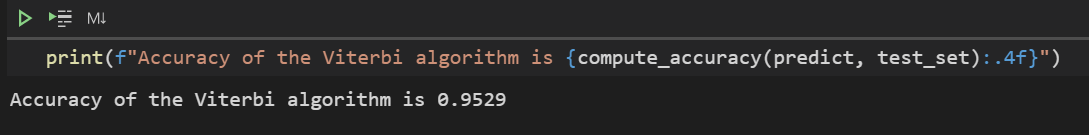